# Final Project
## LSTM: Prediction on bike sharing demand

In [1]:
# Import

import folium
from folium.plugins import MarkerCluster

# data set
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# LSTM
import tensorflow as tf
import keras
from tensorflow.keras import layers
from sklearn import metrics
%matplotlib inline

### Importing the merged dataset

In [2]:
#dataset = pd.read_csv('Joint_dataframe.csv')

dataset = pd.read_csv(
    'April_to_June_3_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

# exclude timestamp column
#dataset = dataset.loc[:, dataset.columns!='timestamp']

In [3]:
dataset = dataset.drop(["index",'is_holiday','is_weekend'], axis = 1)
dataset = dataset.dropna(axis=0, how='any')
dataset

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-01,17,39,2,-22.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.197574,51.4996
2016-04-01,42,24,3,18.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.084606,51.5213
2016-04-01,51,30,4,21.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.120974,51.5301
2016-04-01,44,71,5,-27.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.156876,51.4931
2016-04-01,48,38,6,10.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.144229,51.5181
...,...,...,...,...,...,...,...,...,...,...,...
2016-06-30,1,109,167,-108.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.147624,51.4940
2016-06-30,3,17,168,-14.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.195456,51.5004
2016-06-30,1,30,169,-29.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.165164,51.5147


In [4]:
location = pd.read_csv("Cycle hire docking stations.csv")

In [5]:
#dataset.to_csv (r'C:Desktop\dataframe.csv', index = False, header=True)

## Plotting

In [6]:
def plot_graph(y_train, y_train_inv, y_test_inv, y_pred_inv, i):

    ## Print heading
    plt.title( 'Station Id: %d' % (i))
    plt.plot(np.arange(0, len(y_train)), y_train_inv, color='green', label="History")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv, color='blue', marker='.', label="Actual")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv, color='red', marker='.', label="Prediction")
    plt.ylabel('Bike Count')
    plt.xlabel('Time Step')
    plt.legend()
    #plt.show();
    
    return plt.show();

## Error calculation

In [7]:
from sklearn import metrics

In [8]:
def get_MAE(y_test_inv, y_pred_inv):
    MAE = metrics.mean_absolute_error(y_test_inv, y_pred_inv)
    return MAE

In [9]:
def get_MSE(y_test_inv, y_pred_inv):
    MSE = metrics.mean_squared_error(y_test_inv, y_pred_inv)
    return MSE

In [10]:
def get_RMSE(y_test_inv, y_pred_inv):
    RMSE = np.sqrt(metrics.mean_squared_error(y_test_inv, y_pred_inv))
    return RMSE

In [11]:
def get_RMAE(y_test_inv, y_pred_inv):
    RMAE = np.sqrt(metrics.mean_absolute_error(y_test_inv, y_pred_inv))
    return RMAE

In [12]:
def print_error_calculation(y_test_inv, y_pred_inv):

    print('MAE:', get_MAE(y_test_inv, y_pred_inv))
    print('MSE:', get_MSE(y_test_inv, y_pred_inv))
    print('RMSE:', get_RMSE(y_test_inv, y_pred_inv))
    print('RMAE:', get_RMAE(y_test_inv, y_pred_inv))

### Datasets for each stations

In [13]:
# Extract number of bikes leaving to the station
## for loop with 800 station
## put that info to 800 datasets

obj = dataset.groupby('Station Id')

In [14]:
obj.get_group(1)

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-02,13,22,1,-9.0,10.729167,9.458333,62.125000,14.833333,2.0,-0.109971,51.5292
2016-04-03,27,22,1,5.0,11.562500,11.041667,77.541667,11.312500,3.0,-0.109971,51.5292
2016-04-04,52,20,1,32.0,11.083333,10.500000,77.520833,13.583333,4.0,-0.109971,51.5292
2016-04-05,75,12,1,63.0,11.583333,10.916667,65.708333,14.916667,5.0,-0.109971,51.5292
2016-04-06,41,23,1,18.0,9.500000,7.208333,65.812500,26.437500,6.0,-0.109971,51.5292
...,...,...,...,...,...,...,...,...,...,...,...
2016-06-25,11,9,1,2.0,16.062500,16.062500,73.458333,13.562500,25.0,-0.109971,51.5292
2016-06-26,48,26,1,22.0,16.604167,16.604167,71.145833,19.270833,26.0,-0.109971,51.5292
2016-06-27,23,22,1,1.0,18.062500,18.062500,68.958333,16.041667,27.0,-0.109971,51.5292


In [15]:
# add datasets to list

df = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]

#[35,79,80,179,198,205,237,259,283,285,342,369,385,413,414,415,416,417,418,422,429,434,438,439,493,497,
           #502,525,567,575,582,585,791,797,798,799,802]
    
for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df.append(obj.get_group(i))

### Graph of station 1

[Text(0.5, 0, 'timestamp'), Text(0, 0.5, 'In')]

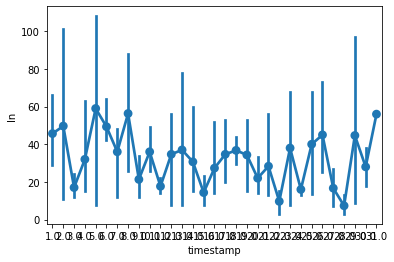

In [16]:
ax = sns.pointplot(x = 'date', y = "In", data = df[1]);
ax.set(xlabel = 'timestamp', ylabel = 'In')

## Comparison

In [17]:
# determine which error is to be used to compare it with, 
# make an array with that error calculated, 
# work out mean , ... , to determine which method is more appropreiate.

## LSTM (Long short-term memory neural networks)

In [18]:
# look for 'time_stemps' of history values
def createDataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        data = X.iloc[i:(i + time_steps)].values
        Xs.append(data)        
        ys.append(y.iloc[i + time_steps])
        
    return np.array(Xs), np.array(ys)

### RobustScalar

In [19]:
# split into train and test sets

# fix random seed for reproducibility
np.random.seed(7)

train_size = int(len(df[1]) * 0.8)
test_size = len(df[1]) - train_size

train, test = df[1].iloc[0:train_size], df[1].iloc[train_size:len(df)]

from sklearn.preprocessing import RobustScaler
f_transformer = RobustScaler()
feature_columns = ['avg_temp', 'avg_temp_feel', 'avg_humidity', 'avg_windSpeed']
f_transformer = f_transformer.fit(train[feature_columns].to_numpy())
train.loc[:, feature_columns] = f_transformer.transform(train[feature_columns].to_numpy())

total_transformer = RobustScaler()
total_transformer = total_transformer.fit(train[['In']])
train['In'] = total_transformer.transform(train[['In']])
test.loc[:, feature_columns] = f_transformer.transform(test[feature_columns].to_numpy())
test['In'] = total_transformer.transform(test[['In']])

time_steps = 3
X_train, y_train = createDataset(train, train['In'], time_steps)
X_test, y_test = createDataset(test, test['In'], time_steps)

/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10060/3950792597.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A valu

2022-04-12 17:51:55.720672: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
2/2 [==============================] - 4s 695ms/step - loss: 0.6706 - val_loss: 0.7205
Epoch 2/20
2/2 [==============================] - 0s 28ms/step - loss: 0.5051 - val_loss: 0.7081
Epoch 3/20
2/2 [==============================] - 0s 33ms/step - loss: 0.5459 - val_loss: 0.8430
Epoch 4/20
2/2 [==============================] - 0s 27ms/step - loss: 0.4701 - val_loss: 0.9422
Epoch 5/20
2/2 [==============================] - 0s 28ms/step - loss: 0.5017 - val_loss: 0.8117
Epoch 6/20
2/2 [==============================] - 0s 28ms/step - loss: 0.4597 - val_loss: 0.6823
Epoch 7/20
2/2 [==============================] - 0s 28ms/step - loss: 0.3909 - val_loss: 0.6557
Epoch 8/20
2/2 [==============================] - 0s 27ms/step - loss: 0.3917 - val_loss: 0.7003
Epoch 9/20
2/2 [==============================] - 0s 31ms/step - loss: 0.4185 - val_loss: 0.8413
Epoch 10/20
2/2 [==============================] - 0s 29ms/step - loss: 0.3039 - val_loss: 0.9406
Epoch 11/20
2/2 [===========

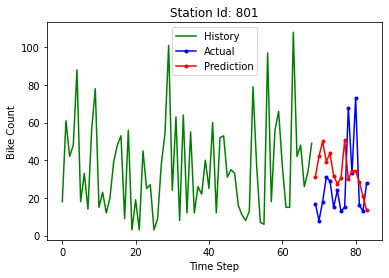

MAE: 19.31773312886556
MSE: 527.864658555963
RMSE: 22.97530540724025
RMAE: 4.395194322082422


In [20]:
LSTM_model = keras.Sequential()
LSTM_model.add(
  layers.Bidirectional(
    layers.LSTM(
      units = 128, 
      input_shape = (X_train.shape[1], X_train.shape[2])
    )
  )
)
LSTM_model.add(layers.Dropout(rate = 0.2))
LSTM_model.add(layers.Dense(units = 1))

LSTM_model.compile(loss='mean_squared_error', optimizer='adam')

history = LSTM_model.fit(
    X_train, y_train, 
    epochs = 20, 
    batch_size = 32, 
    validation_split = 0.1,
    shuffle = False
)

y_pred = LSTM_model.predict(X_test)

y_train_inv = total_transformer.inverse_transform(y_train.reshape(1, -1)).flatten()
y_test_inv = total_transformer.inverse_transform(y_test.reshape(1, -1)).flatten()
y_pred_inv = total_transformer.inverse_transform(y_pred).flatten()

plot_graph(y_train, y_train_inv, y_test_inv, y_pred_inv, i)
print_error_calculation(y_test_inv, y_pred_inv)

### MinMaxScalar

In [21]:
# split into train and test sets

# fix random seed for reproducibility
numpy.random.seed(7)

train_size = int(len(df[1]) * 0.8)
test_size = len(df[1]) - train_size

train, test = df[1].iloc[0:train_size], df[1].iloc[train_size:len(df)]

from sklearn.preprocessing import MinMaxScaler
f_transformer = MinMaxScaler()
feature_columns = ['avg_temp', 'avg_temp_feel', 'avg_humidity', 'avg_windSpeed']
f_transformer = f_transformer.fit(train[feature_columns].to_numpy())
train.loc[:, feature_columns] = f_transformer.transform(train[feature_columns].to_numpy())

total_transformer = MinMaxScaler()
total_transformer = total_transformer.fit(train[['In']])
train['In'] = total_transformer.transform(train[['In']])
test.loc[:, feature_columns] = f_transformer.transform(test[feature_columns].to_numpy())
test['In'] = total_transformer.transform(test[['In']])

time_steps = 3
X_train, y_train = createDataset(train, train['In'], time_steps)
X_test, y_test = createDataset(test, test['In'], time_steps)

/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10060/1590231652.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A valu

In [22]:
LSTM_model = keras.Sequential()
LSTM_model.add(
  layers.Bidirectional(
    layers.LSTM(
      units = 128, 
      input_shape = (X_train.shape[1], X_train.shape[2])
    )
  )
)
LSTM_model.add(layers.Dropout(rate = 0.2))
LSTM_model.add(layers.Dense(units = 1))

LSTM_model.compile(loss='mean_squared_error', optimizer='adam')

history = LSTM_model.fit(
    X_train, y_train, 
    epochs = 20, 
    batch_size = 32, 
    validation_split = 0.1,
    shuffle = False
)

Epoch 1/20
2/2 [==============================] - 4s 633ms/step - loss: 0.2528 - val_loss: 0.1460
Epoch 2/20
2/2 [==============================] - 0s 27ms/step - loss: 0.1651 - val_loss: 0.0792
Epoch 3/20
2/2 [==============================] - 0s 29ms/step - loss: 0.1182 - val_loss: 0.0738
Epoch 4/20
2/2 [==============================] - 0s 28ms/step - loss: 0.1656 - val_loss: 0.0692
Epoch 5/20
2/2 [==============================] - 0s 31ms/step - loss: 0.1257 - val_loss: 0.0590
Epoch 6/20
2/2 [==============================] - 0s 29ms/step - loss: 0.1298 - val_loss: 0.0570
Epoch 7/20
2/2 [==============================] - 0s 29ms/step - loss: 0.0630 - val_loss: 0.0736
Epoch 8/20
2/2 [==============================] - 0s 28ms/step - loss: 0.0746 - val_loss: 0.1027
Epoch 9/20
2/2 [==============================] - 0s 28ms/step - loss: 0.0911 - val_loss: 0.1212
Epoch 10/20
2/2 [==============================] - 0s 27ms/step - loss: 0.1134 - val_loss: 0.1032
Epoch 11/20
2/2 [===========

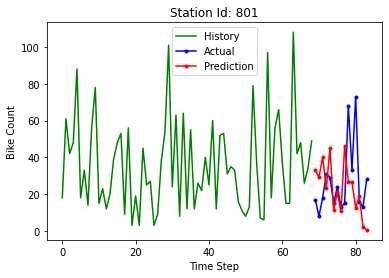

MAE: 18.140508492787678
MSE: 583.4754266279103
RMSE: 24.155236008532608
RMAE: 4.259167582144154


In [23]:
y_pred = LSTM_model.predict(X_test)

y_train_inv = total_transformer.inverse_transform(y_train.reshape(1, -1)).flatten()
y_test_inv = total_transformer.inverse_transform(y_test.reshape(1, -1)).flatten()
y_pred_inv = total_transformer.inverse_transform(y_pred).flatten()

plot_graph(y_train, y_train_inv, y_test_inv, y_pred_inv, i)
print_error_calculation(y_test_inv, y_pred_inv)

# To observe full station 

Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10060/387868806.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value

2/2 [==============================] - 4s 654ms/step - loss: 0.8286 - val_loss: 0.7991
Epoch 2/20
2/2 [==============================] - 0s 27ms/step - loss: 0.4556 - val_loss: 0.8186
Epoch 3/20
2/2 [==============================] - 0s 30ms/step - loss: 0.5002 - val_loss: 0.7131
Epoch 4/20
2/2 [==============================] - 0s 33ms/step - loss: 0.4350 - val_loss: 0.6769
Epoch 5/20
2/2 [==============================] - 0s 32ms/step - loss: 0.4105 - val_loss: 0.6977
Epoch 6/20
2/2 [==============================] - 0s 33ms/step - loss: 0.4276 - val_loss: 0.6923
Epoch 7/20
2/2 [==============================] - 0s 37ms/step - loss: 0.3240 - val_loss: 0.7357
Epoch 8/20
2/2 [==============================] - 0s 32ms/step - loss: 0.3463 - val_loss: 0.7994
Epoch 9/20
2/2 [==============================] - 0s 33ms/step - loss: 0.2711 - val_loss: 0.9167
Epoch 10/20
2/2 [==============================] - 0s 39ms/step - loss: 0.3156 - val_loss: 0.9592
Epoch 11/20
2/2 [======================

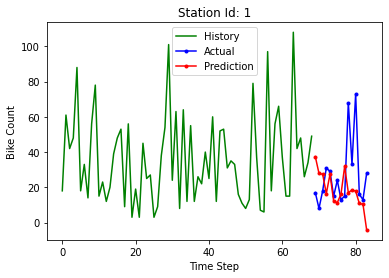

MAE: 17.46458994547526
MSE: 566.7134503921193
RMSE: 23.805744062980246
RMAE: 4.1790656785309395
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10060/387868806.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value

2/2 [==============================] - 4s 689ms/step - loss: 1.1965 - val_loss: 3.2099
Epoch 2/20
2/2 [==============================] - 0s 32ms/step - loss: 1.0535 - val_loss: 2.9875
Epoch 3/20
2/2 [==============================] - 0s 32ms/step - loss: 1.0167 - val_loss: 2.9477
Epoch 4/20
2/2 [==============================] - 0s 32ms/step - loss: 0.9551 - val_loss: 3.0420
Epoch 5/20
2/2 [==============================] - 0s 33ms/step - loss: 0.9006 - val_loss: 3.1749
Epoch 6/20
2/2 [==============================] - 0s 34ms/step - loss: 0.8298 - val_loss: 3.2136
Epoch 7/20
2/2 [==============================] - 0s 33ms/step - loss: 0.6413 - val_loss: 3.1985
Epoch 8/20
2/2 [==============================] - 0s 32ms/step - loss: 0.7393 - val_loss: 3.1849
Epoch 9/20
2/2 [==============================] - 0s 34ms/step - loss: 0.5465 - val_loss: 3.1955
Epoch 10/20
2/2 [==============================] - 0s 33ms/step - loss: 0.6302 - val_loss: 3.2599
Epoch 11/20
2/2 [======================

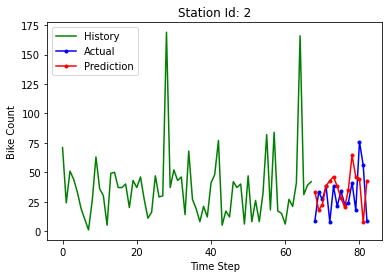

MAE: 19.277647272745767
MSE: 558.5999579269165
RMSE: 23.634719332518348
RMAE: 4.390631762371535
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10060/387868806.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value

2/2 [==============================] - 4s 683ms/step - loss: 0.9701 - val_loss: 5.7456
Epoch 2/20
2/2 [==============================] - 0s 26ms/step - loss: 0.8394 - val_loss: 5.8053
Epoch 3/20
2/2 [==============================] - 0s 26ms/step - loss: 0.6983 - val_loss: 6.1769
Epoch 4/20
2/2 [==============================] - 0s 28ms/step - loss: 0.6337 - val_loss: 6.6014
Epoch 5/20
2/2 [==============================] - 0s 29ms/step - loss: 0.6047 - val_loss: 6.9034
Epoch 6/20
2/2 [==============================] - 0s 31ms/step - loss: 0.5820 - val_loss: 6.9533
Epoch 7/20
2/2 [==============================] - 0s 31ms/step - loss: 0.4332 - val_loss: 6.9222
Epoch 8/20
2/2 [==============================] - 0s 28ms/step - loss: 0.4814 - val_loss: 7.0502
Epoch 9/20
2/2 [==============================] - 0s 28ms/step - loss: 0.4761 - val_loss: 7.2725
Epoch 10/20
2/2 [==============================] - 0s 27ms/step - loss: 0.4166 - val_loss: 7.4909
Epoch 11/20
2/2 [======================

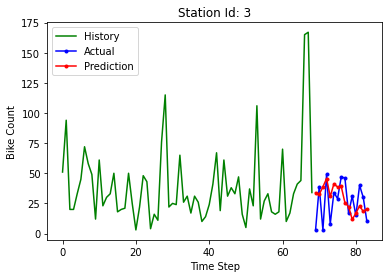

MAE: 14.007285435994467
MSE: 291.1605067500677
RMSE: 17.063425996852676
RMAE: 3.7426308174858054
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10060/387868806.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value

2/2 [==============================] - 4s 611ms/step - loss: 0.9907 - val_loss: 5.8739
Epoch 2/20
2/2 [==============================] - 0s 28ms/step - loss: 0.8086 - val_loss: 5.4085
Epoch 3/20
2/2 [==============================] - 0s 27ms/step - loss: 0.8127 - val_loss: 5.6418
Epoch 4/20
2/2 [==============================] - 0s 28ms/step - loss: 0.6687 - val_loss: 6.1907
Epoch 5/20
2/2 [==============================] - 0s 28ms/step - loss: 0.6391 - val_loss: 6.7881
Epoch 6/20
2/2 [==============================] - 0s 28ms/step - loss: 0.4708 - val_loss: 7.1306
Epoch 7/20
2/2 [==============================] - 0s 28ms/step - loss: 0.5777 - val_loss: 7.1208
Epoch 8/20
2/2 [==============================] - 0s 29ms/step - loss: 0.5884 - val_loss: 6.8672
Epoch 9/20
2/2 [==============================] - 0s 31ms/step - loss: 0.5494 - val_loss: 6.6012
Epoch 10/20
2/2 [==============================] - 0s 29ms/step - loss: 0.5409 - val_loss: 6.4782
Epoch 11/20
2/2 [======================

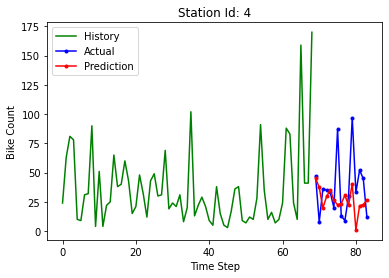

MAE: 21.451461791992188
MSE: 790.1591281119098
RMSE: 28.109769264650854
RMAE: 4.631572280769478
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10060/387868806.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value

2/2 [==============================] - 4s 940ms/step - loss: 0.9533 - val_loss: 0.4532
Epoch 2/20
2/2 [==============================] - 0s 27ms/step - loss: 0.8284 - val_loss: 0.5551
Epoch 3/20
2/2 [==============================] - 0s 29ms/step - loss: 0.7798 - val_loss: 0.5285
Epoch 4/20
2/2 [==============================] - 0s 30ms/step - loss: 0.6530 - val_loss: 0.4338
Epoch 5/20
2/2 [==============================] - 0s 31ms/step - loss: 0.6489 - val_loss: 0.4171
Epoch 6/20
2/2 [==============================] - 0s 29ms/step - loss: 0.7958 - val_loss: 0.4194
Epoch 7/20
2/2 [==============================] - 0s 30ms/step - loss: 0.7175 - val_loss: 0.4157
Epoch 8/20
2/2 [==============================] - 0s 33ms/step - loss: 0.6190 - val_loss: 0.4509
Epoch 9/20
2/2 [==============================] - 0s 32ms/step - loss: 0.5340 - val_loss: 0.5270
Epoch 10/20
2/2 [==============================] - 0s 31ms/step - loss: 0.5459 - val_loss: 0.5808
Epoch 11/20
2/2 [======================

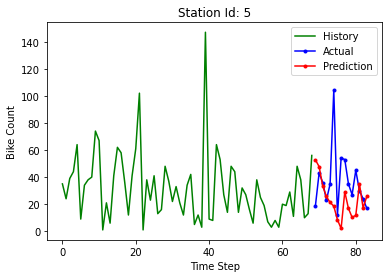

MAE: 20.734014129638673
MSE: 920.1094218898536
RMSE: 30.333305489014112
RMAE: 4.553461774259083
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10060/387868806.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value

2/2 [==============================] - 4s 607ms/step - loss: 4.9984 - val_loss: 2.1341
Epoch 2/20
2/2 [==============================] - 0s 26ms/step - loss: 3.6304 - val_loss: 1.4429
Epoch 3/20
2/2 [==============================] - 0s 26ms/step - loss: 3.7035 - val_loss: 1.3535
Epoch 4/20
2/2 [==============================] - 0s 26ms/step - loss: 3.4897 - val_loss: 1.4379
Epoch 5/20
2/2 [==============================] - 0s 28ms/step - loss: 3.4398 - val_loss: 1.5375
Epoch 6/20
2/2 [==============================] - 0s 28ms/step - loss: 3.3178 - val_loss: 1.6379
Epoch 7/20
2/2 [==============================] - 0s 27ms/step - loss: 3.1142 - val_loss: 1.7400
Epoch 8/20
2/2 [==============================] - 0s 30ms/step - loss: 2.9086 - val_loss: 1.8466
Epoch 9/20
2/2 [==============================] - 0s 29ms/step - loss: 3.1174 - val_loss: 1.9338
Epoch 10/20
2/2 [==============================] - 0s 27ms/step - loss: 3.2018 - val_loss: 1.9867
Epoch 11/20
2/2 [======================

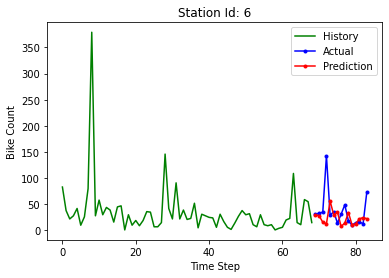

MAE: 23.683185386657716
MSE: 1553.4772186816417
RMSE: 39.41417535204361
RMAE: 4.866537309695438
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10060/387868806.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value

2/2 [==============================] - 4s 720ms/step - loss: 2.6813 - val_loss: 0.8819
Epoch 2/20
2/2 [==============================] - 0s 33ms/step - loss: 1.6955 - val_loss: 0.5912
Epoch 3/20
2/2 [==============================] - 0s 37ms/step - loss: 1.5849 - val_loss: 0.6822
Epoch 4/20
2/2 [==============================] - 0s 35ms/step - loss: 1.7257 - val_loss: 0.7927
Epoch 5/20
2/2 [==============================] - 0s 34ms/step - loss: 1.7497 - val_loss: 0.7681
Epoch 6/20
2/2 [==============================] - 0s 34ms/step - loss: 1.5575 - val_loss: 0.7004
Epoch 7/20
2/2 [==============================] - 0s 33ms/step - loss: 1.5212 - val_loss: 0.6637
Epoch 8/20
2/2 [==============================] - 0s 34ms/step - loss: 1.3712 - val_loss: 0.6611
Epoch 9/20
2/2 [==============================] - 0s 39ms/step - loss: 1.2866 - val_loss: 0.6718
Epoch 10/20
2/2 [==============================] - 0s 39ms/step - loss: 1.6377 - val_loss: 0.6782
Epoch 11/20
2/2 [======================

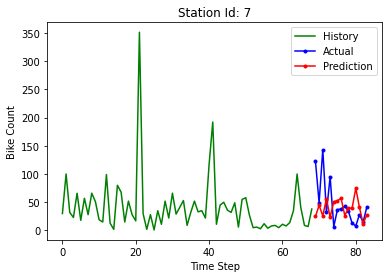

MAE: 35.98115514119466
MSE: 2501.944211892417
RMSE: 50.01943834043338
RMAE: 5.998429389531451
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10060/387868806.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value

2/2 [==============================] - 5s 1s/step - loss: 3.3072 - val_loss: 0.3161
Epoch 2/20
2/2 [==============================] - 0s 30ms/step - loss: 2.9191 - val_loss: 0.1774
Epoch 3/20
2/2 [==============================] - 0s 35ms/step - loss: 2.7394 - val_loss: 0.1680
Epoch 4/20
2/2 [==============================] - 0s 38ms/step - loss: 2.8262 - val_loss: 0.2181
Epoch 5/20
2/2 [==============================] - 0s 29ms/step - loss: 2.3761 - val_loss: 0.3607
Epoch 6/20
2/2 [==============================] - 0s 27ms/step - loss: 2.4923 - val_loss: 0.5510
Epoch 7/20
2/2 [==============================] - 0s 30ms/step - loss: 2.4600 - val_loss: 0.6662
Epoch 8/20
2/2 [==============================] - 0s 29ms/step - loss: 2.2056 - val_loss: 0.7223
Epoch 9/20
2/2 [==============================] - 0s 29ms/step - loss: 2.0973 - val_loss: 0.7050
Epoch 10/20
2/2 [==============================] - 0s 29ms/step - loss: 2.0204 - val_loss: 0.6966
Epoch 11/20
2/2 [=========================

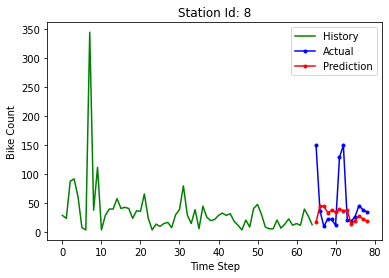

MAE: 36.005403246198384
MSE: 2966.359201264583
RMSE: 54.464292901538556
RMAE: 6.000450253622505
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10060/387868806.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value

2/2 [==============================] - 3s 625ms/step - loss: 2.9085 - val_loss: 3.8364
Epoch 2/20
2/2 [==============================] - 0s 23ms/step - loss: 2.0433 - val_loss: 2.9323
Epoch 3/20
2/2 [==============================] - 0s 23ms/step - loss: 1.6183 - val_loss: 2.5888
Epoch 4/20
2/2 [==============================] - 0s 24ms/step - loss: 1.6216 - val_loss: 2.5249
Epoch 5/20
2/2 [==============================] - 0s 24ms/step - loss: 1.6835 - val_loss: 2.5176
Epoch 6/20
2/2 [==============================] - 0s 26ms/step - loss: 1.3896 - val_loss: 2.5111
Epoch 7/20
2/2 [==============================] - 0s 26ms/step - loss: 1.4401 - val_loss: 2.5299
Epoch 8/20
2/2 [==============================] - 0s 26ms/step - loss: 1.3109 - val_loss: 2.5628
Epoch 9/20
2/2 [==============================] - 0s 27ms/step - loss: 1.2966 - val_loss: 2.5824
Epoch 10/20
2/2 [==============================] - 0s 27ms/step - loss: 1.3965 - val_loss: 2.5655
Epoch 11/20
2/2 [======================

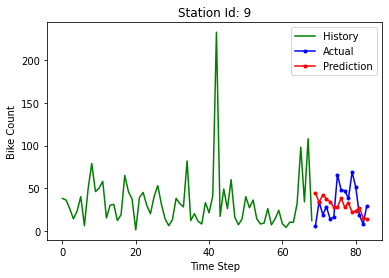

MAE: 18.829189682006835
MSE: 530.6095884085737
RMSE: 23.034964475956407
RMAE: 4.3392614212567135

Error Calculation
Average MAE: 20.743393203190394
Average MSE: 1067.9132685318084
Average RMSE: 28.987983521598817
Average RMAE: 4.270204068752294


In [24]:
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(1, no_station):  
    # split into train and test sets
    train_size = int(len(df[i]) * 0.8)
    test_size = len(df[i]) - train_size

    train, test = df[i].iloc[0:train_size], df[i].iloc[train_size:len(df[i])]

    from sklearn.preprocessing import RobustScaler
    f_transformer = RobustScaler()
    feature_columns = ['avg_temp', 'avg_temp_feel', 'avg_humidity', 'avg_windSpeed']
    f_transformer = f_transformer.fit(train[feature_columns].to_numpy())
    train.loc[:, feature_columns] = f_transformer.transform(train[feature_columns].to_numpy())

    total_transformer = RobustScaler()
    total_transformer = total_transformer.fit(train[['In']])
    train['In'] = total_transformer.transform(train[['In']])
    test.loc[:, feature_columns] = f_transformer.transform(test[feature_columns].to_numpy())
    test['In'] = total_transformer.transform(test[['In']])

    time_steps = 3
    X_train, y_train = createDataset(train, train['In'], time_steps)
    X_test, y_test = createDataset(test, test['In'], time_steps)
    
    from tensorflow.keras import layers

    LSTM_model = keras.Sequential()
    LSTM_model.add(
      layers.Bidirectional(
        layers.LSTM(
          units = 128, 
          input_shape = (X_train.shape[1], X_train.shape[2])
        )
      )
    )
    LSTM_model.add(layers.Dropout(rate = 0.2))
    LSTM_model.add(layers.Dense(units = 1))

    LSTM_model.compile(loss='mean_squared_error', optimizer='adam')

    history = LSTM_model.fit(
        X_train, y_train, 
        epochs = 20, 
        batch_size = 32, 
        validation_split = 0.1,
        shuffle = False
    )
    
    y_pred = LSTM_model.predict(X_test)
    y_train_inv = total_transformer.inverse_transform(y_train.reshape(1, -1)).flatten()
    y_test_inv = total_transformer.inverse_transform(y_test.reshape(1, -1)).flatten()
    y_pred_inv = total_transformer.inverse_transform(y_pred).flatten()


    plot_graph(y_train, y_train_inv, y_test_inv, y_pred_inv, i)
    print_error_calculation(y_test_inv, y_pred_inv)
    totalMAE += get_MAE(y_test_inv, y_pred_inv)
    totalMSE += get_MSE(y_test_inv, y_pred_inv)
    totalRMAE += get_RMSE(y_test_inv, y_pred_inv)
    totalRMSE += get_RMAE(y_test_inv, y_pred_inv)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
print('Average RMSE:', totalRMAE / no_station)
print('Average RMAE:', totalRMSE / no_station)